# Aprendizaje profundo / MLP Básica (Core)
Descripción
MLP Básica (Core)

Descripción:
En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



Objetivo:

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.



Instrucciones:

1. Carga de datos:
- Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
- Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
- Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

3. Implementación de la MLP:
- Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
- Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

4. Entrenamiento del modelo:
- Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
- Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

5. Evaluación del modelo:
- Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
- Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

In [56]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [64]:
print (df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [65]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [66]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
df = df.drop('Unnamed: 32', axis=1)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [69]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

df = df.drop('id', axis=1) #Este dato me parece irrelevante

#Separo en X y en Y
X = df.drop('diagnosis', axis=1) #Con esto selecciono todo menos la columna diagnosis
y = df['diagnosis'] #Mi columna objetivo

#Utilizo encoder para mis etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#Hago el escalamiento
escaler = StandardScaler()
X = escaler.fit_transform(X)

#Divido el dataset en entrenamiento y en prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') #Capa de salida para la clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/50


/Users/mathiorti/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7778 - loss: 0.5747 - val_accuracy: 0.9121 - val_loss: 0.2963
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - loss: 0.2627 - val_accuracy: 0.9451 - val_loss: 0.1722
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.1538 - val_accuracy: 0.9560 - val_loss: 0.1263
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.1076 - val_accuracy: 0.9780 - val_loss: 0.1079
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0930 - val_accuracy: 0.9780 - val_loss: 0.1000
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0663 - val_accuracy: 0.9780 - val_loss: 0.0914
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0587 - val_accuracy: 0.9670 - val_loss: 0.0902
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0430 - val_accuracy: 0.9670 - val_loss: 0.0889
Epo

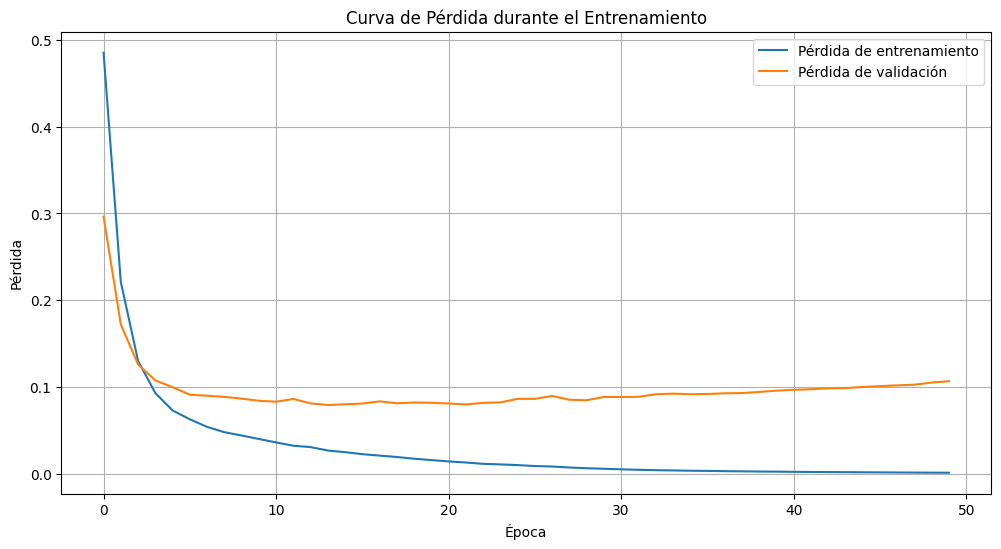

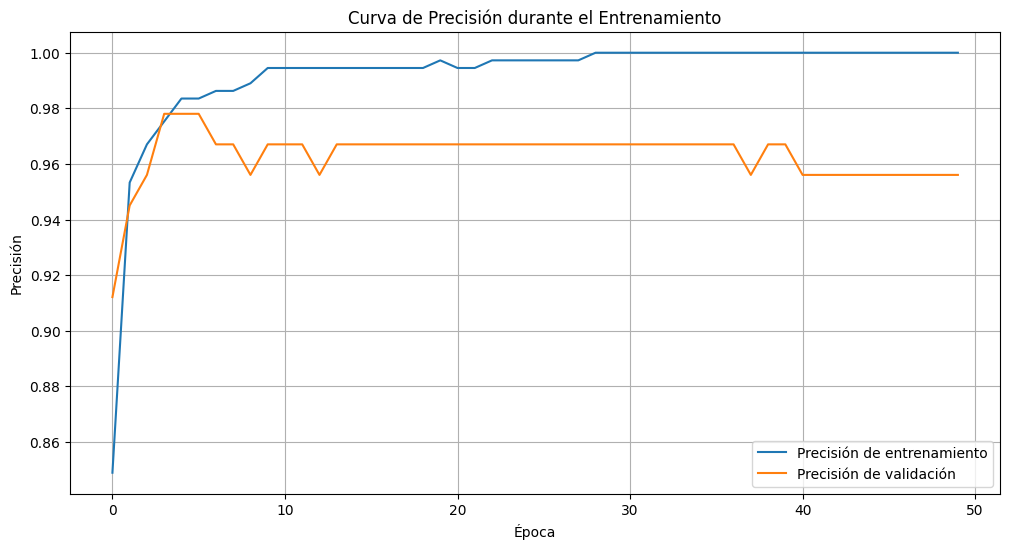

In [71]:
import matplotlib.pyplot as plt
# Grafico las curvas de aprendizaje
# Graficar las curvas de aprendizaje: pérdida y precisión

# Pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


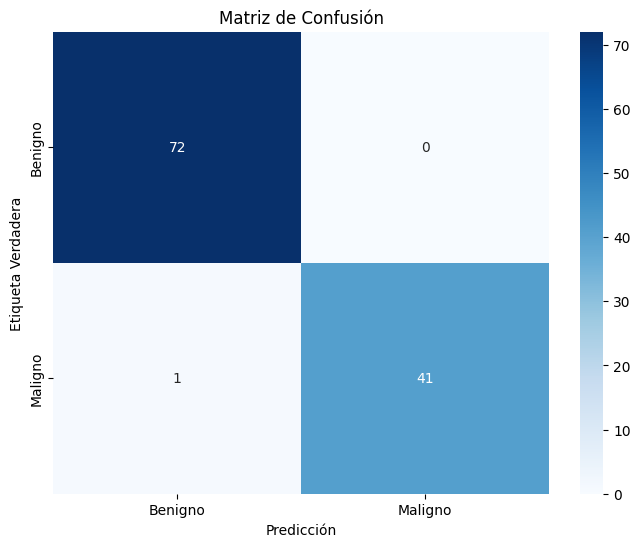

Reporte de Clasificación:
              precision    recall  f1-score   support

     Benigno       0.99      1.00      0.99        72
     Maligno       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno'])
print("Reporte de Clasificación:")
print(report)

# Conclusión
Puedo decir viendo la precisión que mi modelo predice correctamente el 99% de las muestras del conjunto de prueba

El modelo es muy preciso y confiable, alcanza un desempeño casi perfecto en la clasficación de los tumores benignos y malignos. Puedo decir que es una herramienta valiosa para asistir en diagnósticos médicos.